In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape


(200, 5)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df = df.drop("CustomerID", axis=1)


In [9]:
df["Genre"].unique()


array(['Male', 'Female'], dtype=object)

In [10]:
df["Genre"] = df["Genre"].map({"Male": 0, "Female": 1})


In [11]:
df.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [12]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
from sklearn.preprocessing import StandardScaler


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
X_scaled[:5]


array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [16]:
from sklearn.cluster import KMeans


In [17]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


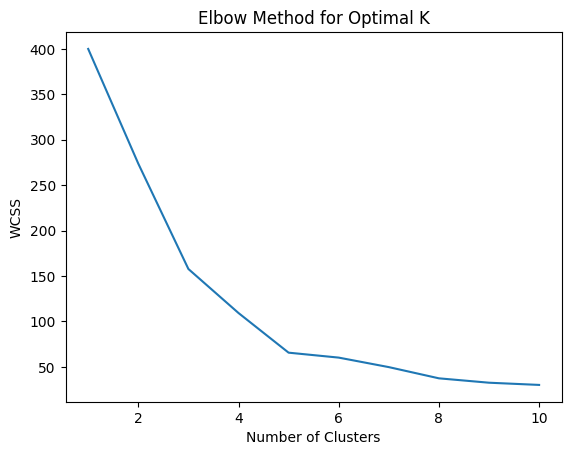

In [18]:
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [20]:
df["Cluster"] = clusters
df.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,4
1,0,21,15,81,2
2,1,20,16,6,4
3,1,23,16,77,2
4,1,31,17,40,4


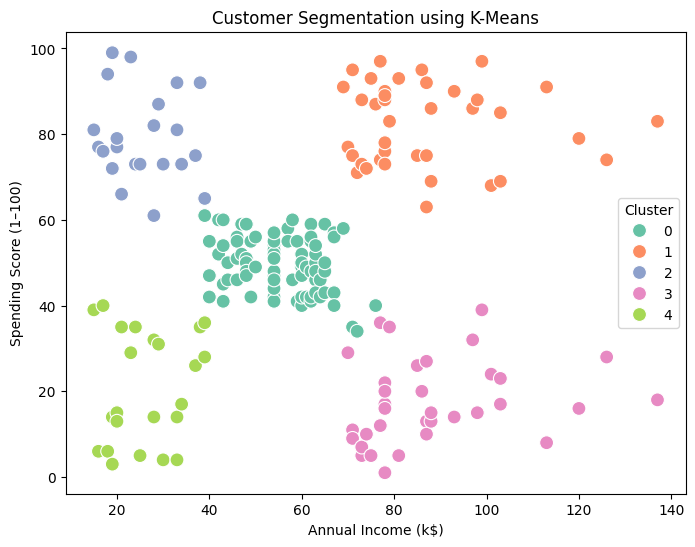

In [21]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster"],
    palette="Set2",
    s=100
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.title("Customer Segmentation using K-Means")
plt.show()


In [22]:
def recommend(cluster):
    if cluster == 0:
        return "Premium and luxury products"
    elif cluster == 1:
        return "Discounted and budget products"
    elif cluster == 2:
        return "Value-for-money products"
    elif cluster == 3:
        return "Trendy and promotional products"
    else:
        return "General product recommendations"


In [23]:
df["Recommendation"] = df["Cluster"].apply(recommend)
df.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Recommendation
0,0,19,15,39,4,General product recommendations
1,0,21,15,81,2,Value-for-money products
2,1,20,16,6,4,General product recommendations
3,1,23,16,77,2,Value-for-money products
4,1,31,17,40,4,General product recommendations
